In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,504210,0,0,DJDiceZ,576,87,-1,0.5,"October 30, 2021",I'm too stupid to play this game.
1,504210,0,0,sonicskrewdriver,367,32,1,3.3,"October 30, 2021","Love it, fun game!"
2,504210,0,0,shawnbyday,293,9,1,17.9,"October 30, 2021",Extremely well-designed game! That solitaire a...
3,504210,0,0,123444y,210,38,1,15.3,"October 29, 2021",Very challenging. I only took a Java 101 back ...
4,504210,1,0,76561198846274171,63,2,1,8.5,"October 29, 2021",Any game that makes you print out datasheets i...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# Time to clean up the columns that aren't useful to our research...
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,0.5,"October 30, 2021",I'm too stupid to play this game.
1,0,0,1,3.3,"October 30, 2021","Love it, fun game!"
2,0,0,1,17.9,"October 30, 2021",Extremely well-designed game! That solitaire a...
3,0,0,1,15.3,"October 29, 2021",Very challenging. I only took a Java 101 back ...
4,1,0,1,8.5,"October 29, 2021",Any game that makes you print out datasheets i...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# I wanted to organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1
5,"October 24, 2021",i cant,0,0,0.5,1
6,"October 24, 2021",My brain hurts. At least there is that amazing...,0,0,42.0,1
7,"October 16, 2021",I write assembly at work so I get paid to buy ...,7,6,6.8,1
8,"October 16, 2021",spent most of the time playing solitaire 10/10,0,0,23.6,1
9,"October 10, 2021",my head explode,0,0,8.4,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  640 non-null    object 
 1   Review_Text     640 non-null    object 
 2   Num_Helpful     640 non-null    int64  
 3   Num_Funny       640 non-null    int64  
 4   Hours_Played    640 non-null    float64
 5   Recommend       640 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 30.1+ KB


In [12]:
# Change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24164/2932033724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1,1635552000
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1,1635552000
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1,1635552000
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1,1635465600
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1,1635465600


In [13]:
# df['Year_Month'] = pd.to_datetime(df['Date_of_Review'], format="%B %d, %Y")

In [14]:
# Change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24164/268641530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1,1635552000,2704
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1,1635552000,2704
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1,1635552000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1,1635465600,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1,1635465600,2704


In [15]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1,1635552000,2704
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1,1635552000,2704
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1,1635552000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1,1635465600,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1,1635465600,2704


In [16]:
# df['Year_Month'] = df['Year_Month'].dt.strftime('%Y-%m')
# df.head()

## - Data Aggregation -

### Number of text reviews per day:

In [17]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
#df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 30, 2021",I'm too stupid to play this game.
1,2704,"October 30, 2021","Love it, fun game!"
2,2704,"October 30, 2021",Extremely well-designed game! That solitaire a...
3,2704,"October 29, 2021",Very challenging. I only took a Java 101 back ...
4,2704,"October 29, 2021",Any game that makes you print out datasheets i...


In [18]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2555,"December 20, 2018",2
1,2555,"December 21, 2018",2
2,2555,"December 25, 2018",2
3,2555,"December 26, 2018",2
4,2556,"December 29, 2018",2
...,...,...,...
393,2701,"October 9, 2021",1
394,2702,"October 16, 2021",2
395,2703,"October 24, 2021",2
396,2704,"October 29, 2021",2


<AxesSubplot:>

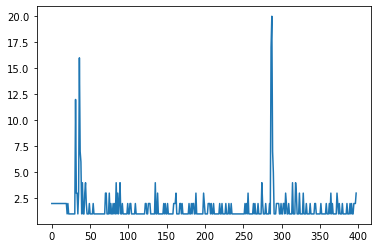

In [19]:
text_days['review_count'].plot()

In [20]:
# Total number of text reviews
text_days['review_count'].sum()

640

In [21]:
# Average number of text reviews per day
text_days['review_count'].mean()

1.6080402010050252

### Number of text reviews per week:

In [22]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2555,8
1,2556,2
2,2557,2
3,2558,2
4,2559,6
...,...,...
128,2700,2
129,2701,2
130,2702,2
131,2703,2


<AxesSubplot:>

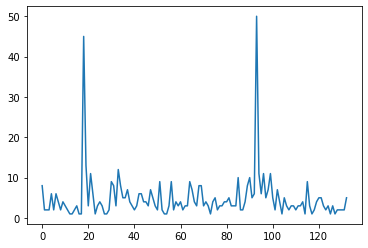

In [23]:
text_weeks['review_count'].plot()

In [24]:
# Total number of text reviews
text_weeks['review_count'].sum()

640

In [25]:
# Average number of text reviews per week
text_weeks['review_count'].mean()

4.81203007518797

### Num_Helpful per week:

In [26]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1,1635552000,2704
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1,1635552000,2704
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1,1635552000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1,1635465600,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1,1635465600,2704


In [27]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2555,10
1,2556,2
2,2557,10
3,2558,14
4,2559,4
...,...,...
128,2700,5
129,2701,2
130,2702,7
131,2703,0


In [28]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,3,0,1.0,1.250000
2556,1,1,1.0,1.000000
2557,5,5,5.0,5.000000
2558,7,7,7.0,7.000000
2559,2,0,0.0,0.666667
...,...,...,...,...
2700,3,2,2.5,2.500000
2701,2,0,1.0,1.000000
2702,7,0,3.5,3.500000


In [29]:
# Total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

2421

In [30]:
# Average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.7828125

### Num_Funny per week:

In [31]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})


,Date_Epoch_Week,Num_Funny
0,2555,12
1,2556,0
2,2557,28
3,2558,30
4,2559,0
...,...,...
128,2700,0
129,2701,0
130,2702,6
131,2703,0


### Hours_Played per week:

In [32]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2555,243.6
1,2556,210.2
2,2557,1.2
3,2558,57.0
4,2559,173.0
...,...,...
128,2700,106.0
129,2701,87.3
130,2702,30.4
131,2703,42.5


In [33]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,63.6,1.9,28.15,30.450000
2556,105.1,105.1,105.10,105.100000
2557,0.6,0.6,0.60,0.600000
2558,28.5,28.5,28.50,28.500000
2559,56.5,9.5,20.50,28.833333
...,...,...,...,...
2700,75.0,31.0,53.00,53.000000
2701,78.9,8.4,43.65,43.650000
2702,23.6,6.8,15.20,15.200000


In [34]:
# Total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

28894.199999999997

In [35]:
# Average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

45.14718750000004

### Recommend per week:

In [36]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# Avg number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2555,1.0
1,2556,1.0
2,2557,-1.0
3,2558,1.0
4,2559,1.0
...,...,...
128,2700,1.0
129,2701,1.0
130,2702,1.0
131,2703,1.0


In [37]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,1,1,1.0,1.0
2556,1,1,1.0,1.0
2557,-1,-1,-1.0,-1.0
2558,1,1,1.0,1.0
2559,1,1,1.0,1.0
...,...,...,...,...
2700,1,1,1.0,1.0
2701,1,1,1.0,1.0
2702,1,1,1.0,1.0


In [38]:
# Total number of users who recommend the game
df_recmd['Recommend'].sum()

564

In [39]:
# Average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.88125

## Feature Scaling - Min-Max Normalization

In [40]:
#from sklearn.preprocessing import MinMaxScaler

In [41]:
#scaling = MinMaxScaler()

In [42]:
#scaling.fit_transform(df[['Recommend', ]])

In [43]:
df_min_max_scaled = df.copy()

In [44]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.5,-1,1635552000,2704
1,"October 30, 2021","Love it, fun game!",0,0,3.3,1,1635552000,2704
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,17.9,1,1635552000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,15.3,1,1635465600,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,8.5,1,1635465600,2704


In [45]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Num_Funny'] = (df_min_max_scaled['Num_Funny'] - df_min_max_scaled['Num_Funny'].min()) / (df_min_max_scaled['Num_Funny'].max() - df_min_max_scaled['Num_Funny'].min())
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.000413,0.0,1.000000,2704
1,"October 30, 2021","Love it, fun game!",0,0,0.003304,1.0,1.000000,2704
2,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,0.018377,1.0,1.000000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,0.015693,1.0,0.999043,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,0.008672,1.0,0.999043,2704
...,...,...,...,...,...,...,...,...
635,"January 24, 2021",never thought of programming simulator XD very...,0,0,0.003613,1.0,0.733014,2664
636,"January 24, 2021",assembler (low level) code programming with a ...,1,0,0.022816,1.0,0.733014,2664
637,"January 24, 2021",I've always been curious about this game but I...,0,0,0.000206,1.0,0.733014,2664
638,"January 24, 2021","I am a computer science major, I knew what I w...",0,0,0.000000,1.0,0.733014,2664


In [46]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [47]:
pd.set_option('display.max_rows', None)

In [48]:
df_sorted = df_sorted.reset_index(drop=True)

## Kinda Cleaning Review Text

In [49]:
# Drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
# Delete Chinese characters and duplicates
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')
df_sorted = df_sorted.drop_duplicates()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24164/2027805606.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [51]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",I'm too stupid to play this game.,0,0,0.000413,0.0,1.000000,2704
1,"October 30, 2021",Extremely well-designed game! That solitaire a...,0,0,0.018377,1.0,1.000000,2704
2,"October 30, 2021","Love it, fun game!",0,0,0.003304,1.0,1.000000,2704
3,"October 29, 2021",Very challenging. I only took a Java 101 back ...,0,0,0.015693,1.0,0.999043,2704
4,"October 29, 2021",Any game that makes you print out datasheets i...,1,0,0.008672,1.0,0.999043,2704
5,"October 24, 2021",i cant,0,0,0.000413,1.0,0.994258,2703
6,"October 24, 2021",My brain hurts. At least there is that amazing...,0,0,0.043258,1.0,0.994258,2703
7,"October 16, 2021",I write assembly at work so I get paid to buy ...,7,6,0.006917,1.0,0.986603,2702
8,"October 16, 2021",spent most of the time playing solitaire 10/10,0,0,0.024262,1.0,0.986603,2702
9,"October 10, 2021",my head explode,0,0,0.008569,1.0,0.980861,2701


In [52]:
# Review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [53]:
df_text_list

Date_Epoch_Week
2555    [Computer Science - The Game, Very good game, ...
2556    [Zachatronics is running totally unopposed in ...
2557                   [This Game is way to complicated.]
2558    [mov 2 manualmov 2 guidesmov 2 discussionsadd ...
2559    [Makes you feel retarded in the best kind of w...
2560    [maybe not the game for everyone, but for thos...
2562    [Thanks to this game, I'm breezing through my ...
2563    [Brilliant little game that makes you feel lik...
2565    [It's more fun to program a real microcontroll...
2566    [I'm addicted... halp., RTFM.Seriously, you wi...
2568    [the only game in which I play solitaire in or...
2569    [Remove a chip here, a phone jack there. COST ...
2570                                             [8.5/10]
2572                                                   []
2573    [These guys continue to do it right., After 16...
2574    [This game is so awesome. Perfect design, good...
2576    [This is great!  Solving the puzzles is fun, a..

In [54]:
# storing data in JSON format
df_text_list.to_json('shenzhen_text.json', orient = 'split', compression = 'infer')

In [55]:
#reading the JSON file
shenzhen_text = pd.read_json('shenzhen_text.json')
print(shenzhen_text)

            name  index                                               data
0    Review_Text   2555  [Computer Science - The Game, Very good game, ...
1    Review_Text   2556  [Zachatronics is running totally unopposed in ...
2    Review_Text   2557                 [This Game is way to complicated.]
3    Review_Text   2558  [mov 2 manualmov 2 guidesmov 2 discussionsadd ...
4    Review_Text   2559  [Makes you feel retarded in the best kind of w...
5    Review_Text   2560  [maybe not the game for everyone, but for thos...
6    Review_Text   2562  [Thanks to this game, I'm breezing through my ...
7    Review_Text   2563  [Brilliant little game that makes you feel lik...
8    Review_Text   2565  [It's more fun to program a real microcontroll...
9    Review_Text   2566  [I'm addicted... halp., RTFM.Seriously, you wi...
10   Review_Text   2568  [the only game in which I play solitaire in or...
11   Review_Text   2569  [Remove a chip here, a phone jack there. COST ...
12   Review_Text   2570  

In [56]:
# Mean of other columns - save as csv file

mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('shenzhen_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24164/2843764196.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [57]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('shenzhen_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_24164/233266065.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shenzhen_mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [58]:
# storing data in CSV format
game_review = df_sorted.to_csv('shenzhen_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])